
# Análise da Produção Agrícola Municipal com Dados do SIDRA (IBGE)

Este notebook demonstra como utilizar a função `get_sidra_cultura` da biblioteca `sidra_tools.py` para obter dados históricos da Tabela 5457 (Produção Agrícola Municipal) do IBGE.

A análise será feita para a cultura **Café em grão - Total (cód. 40139)** no município de **Três Pontas/MG (cód. 3169406)**.<br>
Se você quer testar isso para outros locais, basta acessar a tabela master do IBGE para levantar o que você precisa (https://apisidra.ibge.gov.br/desctabapi.aspx?c=5457).

In [1]:
import warnings ## <- apenas para deixar a saída mais limpa. Se quiser pode comentar.
warnings.filterwarnings("ignore", category=UserWarning)

import matplotlib.pyplot as plt
import pandas as pd
from geemap_tools.sidra_tools import get_sidra_cultura

## Coleta de Dados do SIDRA

In [2]:
# Três Pontas (MG) - Café em Grão (Total)
df_cafe = get_sidra_cultura(cod_mun='3169406', cod_cultura='40139', debug=True)
df_cafe.head()


[DEBUG] Baixando variável A.plantada de https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela5457.xlsx&terr=N&rank=-&query=t/5457/n6/3169406/v/8331/p/all/c782/40139/l/c782%2Bt,,p%2Bv
[DEBUG] Baixando variável A.colhida de https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela5457.xlsx&terr=N&rank=-&query=t/5457/n6/3169406/v/216/p/all/c782/40139/l/c782%2Bt,,p%2Bv
[DEBUG] Baixando variável Q.colhida de https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela5457.xlsx&terr=N&rank=-&query=t/5457/n6/3169406/v/214/p/all/c782/40139/l/c782%2Bt,,p%2Bv
[DEBUG] Baixando variável Rendimento de https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela5457.xlsx&terr=N&rank=-&query=t/5457/n6/3169406/v/112/p/all/c782/40139/l/c782%2Bt,,p%2Bv
[DEBUG] Dados extraídos com sucesso:
            A.plantada  A.colhida  Q.colhida  Rendimento
Ano                                                     
1974-01-01         NaN    12000.0    30000.0      2500.0
1975-01-01         NaN    12117.0    

C:\Users\abelem\Documents\GitHub\geemap-tools\geemap_tools\sidra_tools.py:73: UserWarning: ⚠️ Café passou a ser informado como grão/beneficiado apenas a partir de 2002.
  warnings.warn("⚠️ Café passou a ser informado como grão/beneficiado apenas a partir de 2002.")


,A.plantada,A.colhida,Q.colhida,Rendimento
Ano,,,,
1974-01-01,NaN,12000.0,30000.0,2500.0
1975-01-01,NaN,12117.0,7270.0,600.0
1976-01-01,NaN,10724.0,13641.0,1272.0
1977-01-01,NaN,9145.0,18290.0,2000.0
1978-01-01,NaN,7017.0,13877.0,1978.0


## Visualização dos Dados Históricos

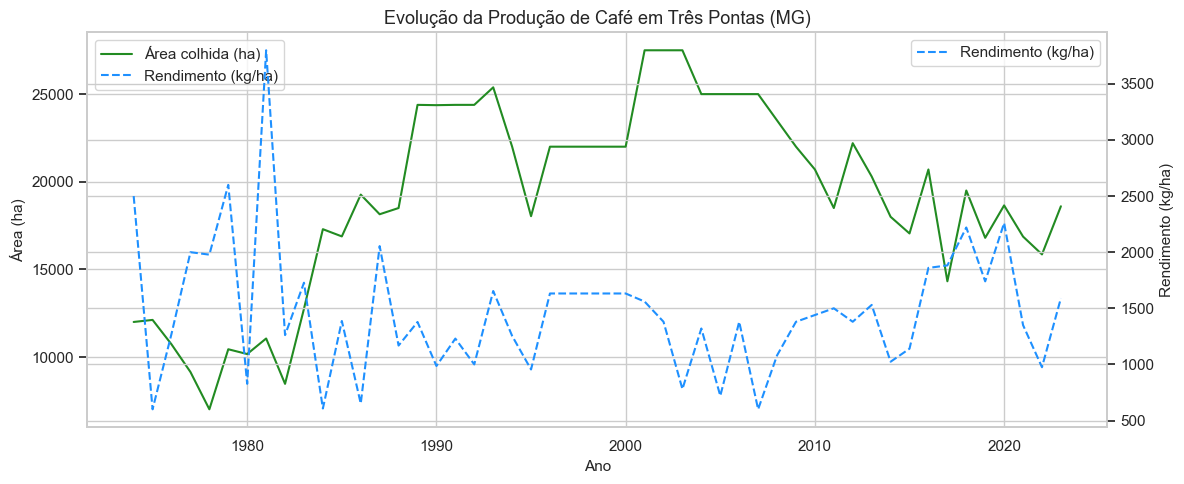

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura o estilo do seaborn
sns.set(style="whitegrid")

# Cria a figura e os dois eixos
fig, ax1 = plt.subplots(figsize=(12, 5))

# Eixo primário: Área colhida e Quantidade colhida
sns.lineplot(ax=ax1, x=df_cafe.index, y=df_cafe['A.colhida'], label='Área colhida (ha)', color='forestgreen')

ax1.set_ylabel("Área (ha)", fontsize=11)
ax1.set_xlabel("Ano", fontsize=11)

# Eixo secundário: Rendimento
ax2 = ax1.twinx()
sns.lineplot(ax=ax2, x=df_cafe.index, y=df_cafe['Rendimento'], label='Rendimento (kg/ha)', color='dodgerblue', linestyle='--')
ax2.set_ylabel("Rendimento (kg/ha)", fontsize=11)

# Combina as legendas
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title("Evolução da Produção de Café em Três Pontas (MG)", fontsize=13)
plt.tight_layout()
plt.show()



## Observações:

- A unidade de **quantidade produzida** é convertida para **mil kg** apenas para facilitar a visualização.
- Os dados do último ano podem ser **preliminares** e sujeitos a alterações.
- Para frutas, culturas especiais ou dados antigos, **verifique os avisos automáticos (warnings)** exibidos na coleta.
- Dados muito antigos devem ser interpretados com cautela.

Fonte: [SIDRA - IBGE](https://sidra.ibge.gov.br/tabela/5457)
